###
* 인공지능 > 머신러닝 > 딥러닝
* 이미지 데이터
* R은 딥러닝에는 어느정도 한계
* Python은 필요 지식
    * R도 알면 좋다.
* 이미지

* ANN - Artificial Neural Network
* 자체평가 데이터 셋
* train_test_split

In [1]:
import tensorflow as tf
import keras
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
print(f'tensorflow: {tf.__version__}')
print(f'keras: {keras.__version__}')
print(f'python: {sys.version}')
print(f'numpy: {np.__version__}')
print(f'matplotlib: {matplotlib.__version__}')

tensorflow: 2.9.1
keras: 2.9.0
python: 3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
numpy: 1.23.1
matplotlib: 3.5.2


### 딥러닝 라이브러리
* tensorflow - 제일 처음. (4만명)
* keras - 더 간단한 코드
* pytorch - (1만명)
    * tf 1.x -> tf 2.x (자동화 추가)

In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train[0].shape

(28, 28)

5 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

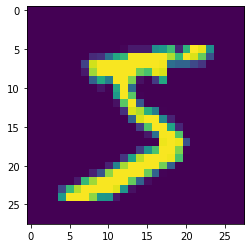

In [7]:
print(y_train[0], X_train[0])
plt.imshow(X_train[0])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

label: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


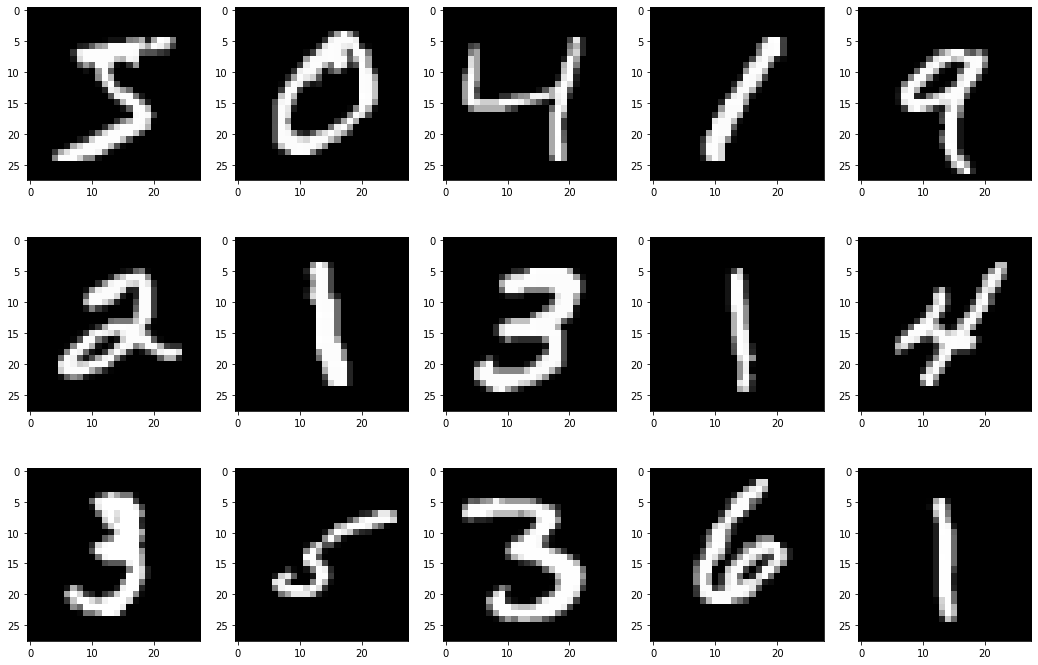

In [10]:
figure, axes = plt.subplots(3, 5)
figure.set_size_inches(18, 12)
plt.gray()

print(f'label: {y_train[:15]}')

col = 0
for row in range(0, 3):
    col = row * 5
    for c in range(0, 5):
        axes[row][c].imshow(X_train[col + c])

label: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


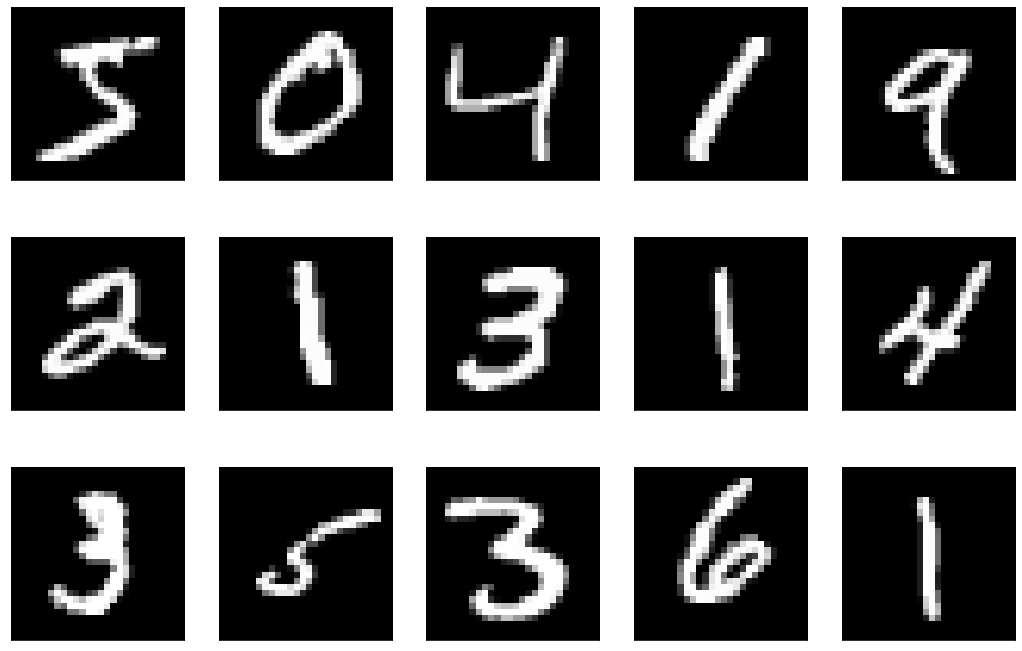

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(18, 12), subplot_kw={'xticks': (), 'yticks': ()})
plt.gray()

print(f'label: {y_train[:15]}')

for image, ax in zip(X_train, axes.ravel()):
    ax.imshow(image)

### 데이터 전처리
* one-hot encoding
* 5 -> 0 0 0 0 0 1 0 0 0 0
* 3 -> 0 0 0 1 0 0 0 0 0 0
* X
    * (60000, 28, 28) -> (60000, 28*28)
* y
    * (60000,) -> (60000, 10)

In [14]:
print(X_train.shape, y_train.shape)
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


### 모델 구축 및 학습, 평가
* softmax - 결과값 합이 1 (확률)
* optimizer - 가중치 결정하는 방법
    * sgd (Stochastic Gradient Descent)
* metrics

In [16]:
model = Sequential()
model.add(Dense(units=64, input_dim=28 * 28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [19]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 3s 540us/step - loss: 32.2079 - accuracy: 0.1117 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/10
6000/6000 [==============================] - 3s 563us/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/10
6000/6000 [==============================] - 3s 532us/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/10
6000/6000 [==============================] - 3s 542us/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 5/10
6000/6000 [==============================] - 3s 522us/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
6000/6000 [==============================] - 3s 532us/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/10
6000/6000 [==============================] - 3s 542us/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 